### Exploratory Data Analysis on IPL Auction data set

In [1]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import math
import statistics as stt
import scipy.stats as stats
import missingno as ms 

import warnings
warnings.filterwarnings("ignore")

## Dataset Analysed : IPL Auction 

In [2]:
df = pd.read_excel('IPL.xlsx')
df.head()

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,...,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
0,1,"Abdulla, YA",2,SA,KXIP,Allrounder,0,0,0,0.00,...,0.00,0,307,15,20.47,8.90,13.93,2009,50000,50000
1,2,Abdur Razzak,2,BAN,RCB,Bowler,214,18,657,71.41,...,0.00,0,29,0,0.00,14.50,0.00,2008,50000,50000
2,3,"Agarkar, AB",2,IND,KKR,Bowler,571,58,1269,80.62,...,121.01,5,1059,29,36.52,8.81,24.90,2008,200000,350000
3,4,"Ashwin, R",1,IND,CSK,Bowler,284,31,241,84.56,...,76.32,0,1125,49,22.96,6.23,22.14,2011,100000,850000
4,5,"Badrinath, S",2,IND,CSK,Batsman,63,0,79,45.93,...,120.71,28,0,0,0.00,0.00,0.00,2011,100000,800000


#### Shape of dataset

In [3]:
df.shape  #The data has 130 rows and 26 columns

(130, 26)

#### Datatypes of the dataset

In [4]:
df.dtypes

Sl.NO.             int64
PLAYER NAME       object
AGE                int64
COUNTRY           object
TEAM              object
PLAYING ROLE      object
T-RUNS             int64
T-WKTS             int64
ODI-RUNS-S         int64
ODI-SR-B         float64
ODI-WKTS           int64
ODI-SR-BL        float64
CAPTAINCY EXP      int64
RUNS-S             int64
HS                 int64
AVE              float64
SR-B             float64
SIXERS             int64
RUNS-C             int64
WKTS               int64
AVE-BL           float64
ECON             float64
SR-BL            float64
AUCTION YEAR       int64
BASE PRICE         int64
SOLD PRICE         int64
dtype: object

#### Checking for null values

In [5]:
df.isnull().sum()  ## the dataset has 0 null values

Sl.NO.           0
PLAYER NAME      0
AGE              0
COUNTRY          0
TEAM             0
PLAYING ROLE     0
T-RUNS           0
T-WKTS           0
ODI-RUNS-S       0
ODI-SR-B         0
ODI-WKTS         0
ODI-SR-BL        0
CAPTAINCY EXP    0
RUNS-S           0
HS               0
AVE              0
SR-B             0
SIXERS           0
RUNS-C           0
WKTS             0
AVE-BL           0
ECON             0
SR-BL            0
AUCTION YEAR     0
BASE PRICE       0
SOLD PRICE       0
dtype: int64

#### Columns in the dataset

In [6]:
df.columns

Index(['Sl.NO.', 'PLAYER NAME', 'AGE', 'COUNTRY', 'TEAM', 'PLAYING ROLE',
       'T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'CAPTAINCY EXP', 'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C',
       'WKTS', 'AVE-BL', 'ECON', 'SR-BL', 'AUCTION YEAR', 'BASE PRICE',
       'SOLD PRICE'],
      dtype='object')

## 1)	Plot the following charts and mention any two inferences.

In [7]:
df['AGE'].value_counts()

2    86
3    28
1    16
Name: AGE, dtype: int64

There are three age groups 1,2 and 3

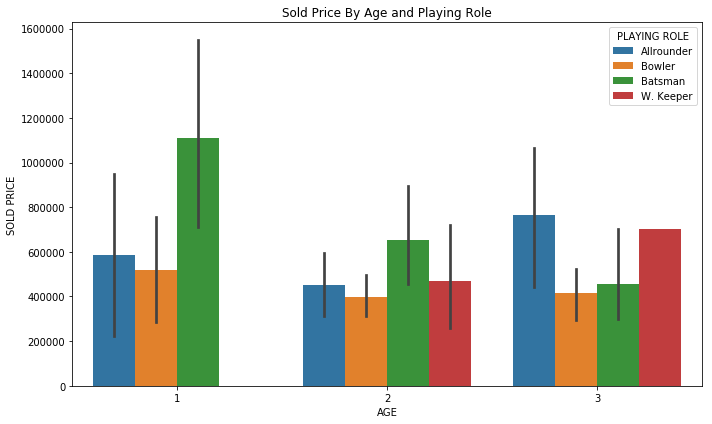

In [8]:
## Chart - 1 - Bar Plot
plt.figure(figsize=(10,6))
sns.barplot(x='AGE', y='SOLD PRICE', data=df, hue='PLAYING ROLE')
plt.xlabel('AGE')
plt.ylabel('SOLD PRICE')
plt.title ('Sold Price By Age and Playing Role')
plt.legend(title='PLAYING ROLE')
plt.tight_layout()
plt.show()

### Inference:

1. Age group 2 and 3 has all the 4 playing roles (Allrounder, Bowler, Batsman and W.keeper).
            a. Age group 2 has Batsman with highest sold price of approx. 700000 Lakhs.
            b. Age group 3 has Allrounder with highest sold price of 800000 Lakhs.

2. Age group 1 has only 3 playing roles (Allrounder, Bowler and Batsman) with Batsman having the highest sold price of approx. 1100000 Lakhs.

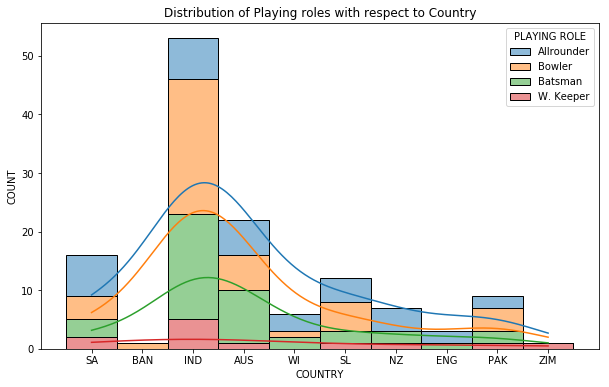

In [9]:
## Chart - 2 - Histogram

plt.figure(figsize=(10,6))
sns.histplot(data=df, x='COUNTRY', hue='PLAYING ROLE', multiple='stack', kde=True)
plt.xlabel('COUNTRY')
plt.ylabel('COUNT')
plt.title('Distribution of Playing roles with respect to Country')
plt.show()

### Inference:

1. Bangladesh and Zimbabwe has only 2 playing roles and the least distribtuion.
                a. Bangladesh has Bowler with almost 0-0.5 distribution 
                b. Zimbabwe has W.Keeper with almost 0-0.5 distribution
                
2. India has all the 4 playing roles and has the highest batsman bar compared to other countires.  

3. Sri Lanka, South Africa and Pakistan almost have similar bowler heights compared to other countries.

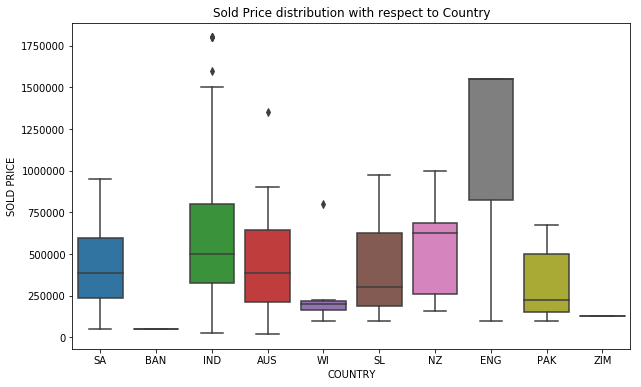

In [10]:
## Chart - 3 - Box Plot

plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='COUNTRY', y='SOLD PRICE', width=0.8, whis=1.5)
plt.xlabel('COUNTRY')
plt.ylabel('SOLD PRICE')
plt.title ('Sold Price distribution with respect to Country')
plt.yticks()
plt.show()

### Inference:

1. India, Australia and West Indies are the countries which have outliers 

2. England has the highest Sold Price compared to other countries

3. There are no extreme outliers or variation for countries Bangladesh and Zimbabwe and the sold price are consistently low.



### 2) It has been observed that one/few outliers are present in the variable ‘SOLD PRICE’.

  i)  Draw a box plot for ‘SOLD PRICE’ with outliers & find the value of IQR, Upper limit & lower limit. 


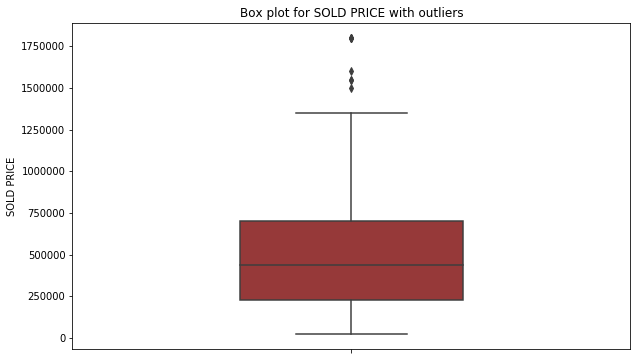

In [11]:
#Box plot for SOLD PRICE with outliers
plt.figure(figsize=(10,6))
sns.boxplot(data=df, y='SOLD PRICE', width=0.4, color='brown')
plt.ylabel('SOLD PRICE')
plt.title('Box plot for SOLD PRICE with outliers')
plt.show()

In [12]:
## Finding IQR, Upper limit and lower limit

Q1 = df['SOLD PRICE'].quantile(0.25)
Q3 = df['SOLD PRICE'].quantile(0.75)
print('Quartile1 of SOLD PRICE :', round(Q1))
print('Quartile3 of SOLD PRICE :', round(Q3))

#calculating IQR
IQR = Q3-Q1
print('IQR of SOLD PRICE :', round(IQR))

#Finding upper limit and lower limit
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
print('Lower limit of SOLD PRICE :', round(lower_limit))
print('Upper limit of SOLD PRICE :', round(upper_limit))

Quartile1 of SOLD PRICE : 225000
Quartile3 of SOLD PRICE : 700000
IQR of SOLD PRICE : 475000
Lower limit of SOLD PRICE : -487500
Upper limit of SOLD PRICE : 1412500


In [13]:
df[(df['SOLD PRICE'] < lower_limit)| (df['SOLD PRICE']>upper_limit)]

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,...,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
15,16,"Dhoni, MS",2,IND,CSK,W. Keeper,3509,0,6773,88.19,...,136.45,64,0,0,0.00,0.00,0.00,2008,400000,1500000
23,24,"Flintoff, A",2,ENG,CSK,Allrounder,3845,226,3394,88.82,...,116.98,2,105,2,52.50,9.55,33.00,2009,950000,1550000
50,51,"Kohli, V",1,IND,RCB,Batsman,491,0,3590,86.31,...,119.29,49,345,4,86.25,8.84,58.50,2011,150000,1800000
83,84,"Pietersen, KP",2,ENG,RCB+,Batsman,6654,5,4184,86.76,...,141.20,30,215,7,30.71,7.41,24.86,2009,1350000,1550000
93,94,"Sehwag, V",2,IND,DD,Batsman,8178,40,8090,104.68,...,167.32,79,226,6,37.67,10.56,21.67,2011,400000,1800000
111,112,"Tendulkar, SR",3,IND,MI,Batsman,15470,45,18426,86.23,...,119.22,24,58,0,0.00,9.67,0.00,2011,400000,1800000
113,114,"Tiwary, SS",1,IND,MI+,Batsman,0,0,49,87.50,...,119.60,32,0,0,0.00,0.00,0.00,2011,100000,1600000
127,128,Yuvraj Singh,2,IND,KXIP+,Batsman,1775,9,8051,87.58,...,131.88,67,569,23,24.74,7.02,21.13,2011,400000,1800000


ii) Remove outliers & draw the box plot. 

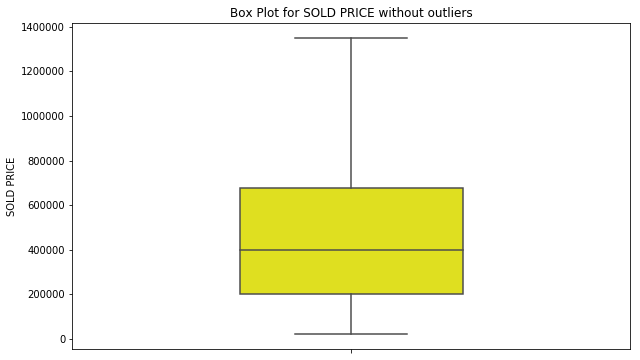

In [14]:
outliers = df[(df['SOLD PRICE'] >= lower_limit)& (df['SOLD PRICE']<=upper_limit)]
plt.figure(figsize=(10,6))
sns.boxplot(data=outliers, y='SOLD PRICE', width=0.4, color='yellow')
plt.ylabel('SOLD PRICE')
plt.title('Box Plot for SOLD PRICE without outliers')
plt.show()

### 3) Assume that we would like to filter certain records such as the players who have hit more than 80 sixers in the IPL tournament. Write a code to display the data frame with only the player name & sixers, for the same.

In [15]:
a = df[df['SIXERS']>80][['PLAYER NAME', 'SIXERS']]
print('Players with more than 80 Sixers are:')
a

Players with more than 80 Sixers are:


,PLAYER NAME,SIXERS
26,"Gayle, CH",129
28,"Gilchrist, AC",86
82,"Pathan, YK",81
88,"Raina, SK",97
97,"Sharma, RG",82
